In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, matthews_corrcoef,\
cohen_kappa_score

from catboost import CatBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import StratifiedKFold

from time import time

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

caa: number of major vessels (0-3)

thall - Thalium Stress Test result (0,3)

target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
df = pd.read_csv('../OneDrive/Documentos/Datasets/HeartAttack/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df = df.rename(columns={'cp':'chest_pain','trtbps':'resting_blood_pressure', 'chol':'cholestoral',\
                       'fbs':'fasting_blood_sugar','restecg':'electrocardiographic',\
                       'thalachh':'maximum_heart_rate_achieved','oldpeak':'previous_peak',\
                       'exng':'exercise_induced_angina', 'caa':'number_of_major_vessels',\
                       'slp':'slope', 'thall':'thalium_stress_test_result'})
df

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slope,number_of_major_vessels,thalium_stress_test_result,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.shape

(303, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          303 non-null    int64  
 1   sex                          303 non-null    int64  
 2   chest_pain                   303 non-null    int64  
 3   resting_blood_pressure       303 non-null    int64  
 4   cholestoral                  303 non-null    int64  
 5   fasting_blood_sugar          303 non-null    int64  
 6   electrocardiographic         303 non-null    int64  
 7   maximum heart rate achieved  303 non-null    int64  
 8   exercise_induced_angina      303 non-null    int64  
 9   previous_peak                303 non-null    float64
 10  slope                        303 non-null    int64  
 11  number_of_major_vessels      303 non-null    int64  
 12  thalium_stress_test_result   303 non-null    int64  
 13  output              

# Prepare Data

## Verify Nulls

In [13]:
df.isnull().sum()

age                            0
sex                            0
chest_pain                     0
resting_blood_pressure         0
cholestoral                    0
fasting_blood_sugar            0
electrocardiographic           0
maximum heart rate achieved    0
exercise_induced_angina        0
previous_peak                  0
slope                          0
number_of_major_vessels        0
thalium_stress_test_result     0
output                         0
dtype: int64

## Verify Erros

In [14]:
df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,electrocardiographic,maximum heart rate achieved,exercise_induced_angina,previous_peak,slope,number_of_major_vessels,thalium_stress_test_result,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.sort_values(by=['age'], ascending=True)

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,electrocardiographic,maximum heart rate achieved,exercise_induced_angina,previous_peak,slope,number_of_major_vessels,thalium_stress_test_result,output
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


## Corr

In [4]:
df.corr()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slope,number_of_major_vessels,thalium_stress_test_result,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
electrocardiographic,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
maximum_heart_rate_achieved,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
previous_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


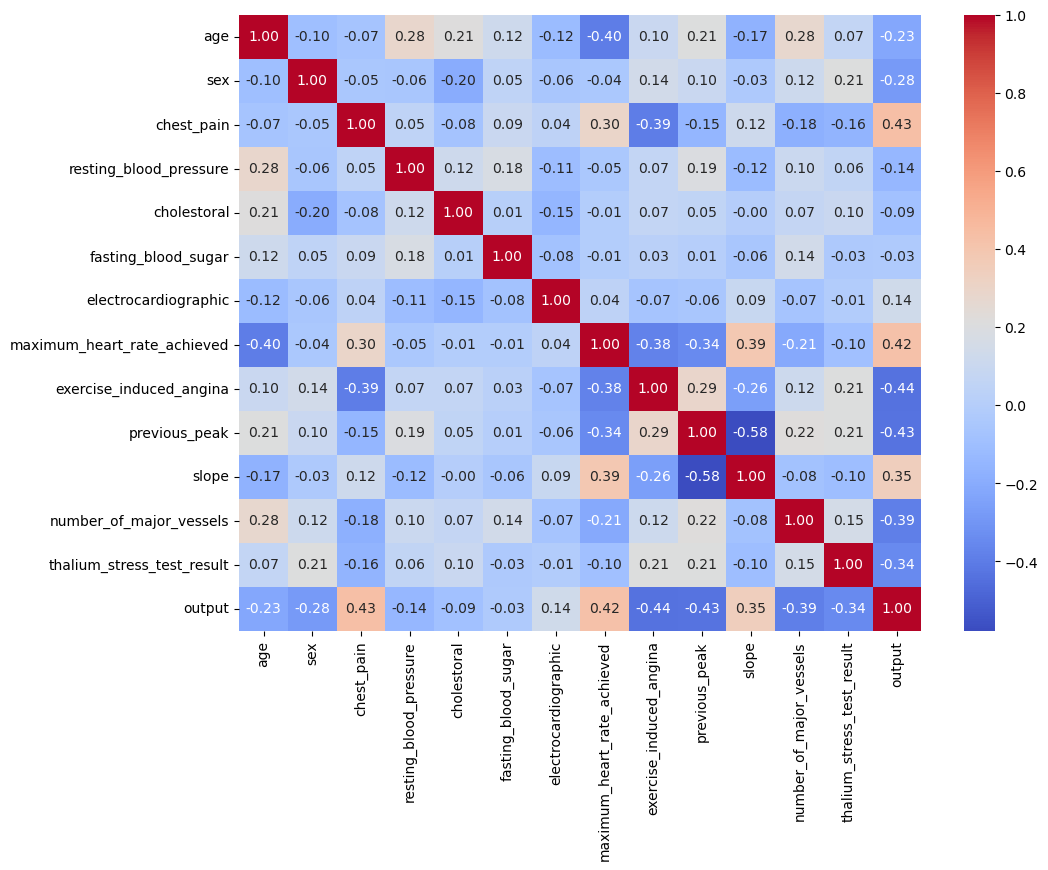

In [5]:
# Correlation
corr2 = df.corr(method='pearson')

# Heatmap 
plt.figure(figsize=(11,8))
sns.heatmap(corr2, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [20]:
corr2[corr2 < 1.00].max().sort_values(ascending=False)

chest_pain                     0.433798
output                         0.433798
maximum_heart_rate_achieved    0.421741
slope                          0.386784
exercise_induced_angina        0.288223
previous_peak                  0.288223
age                            0.279351
resting_blood_pressure         0.279351
number_of_major_vessels        0.276326
cholestoral                    0.213678
thalium_stress_test_result     0.210244
sex                            0.210041
fasting_blood_sugar            0.177531
electrocardiographic           0.137230
dtype: float64

In [21]:
corr2[corr2 < 1.0].min().sort_values(ascending=True)

previous_peak                 -0.577537
slope                         -0.577537
exercise_induced_angina       -0.436757
output                        -0.436757
age                           -0.398522
maximum_heart_rate_achieved   -0.398522
chest_pain                    -0.394280
number_of_major_vessels       -0.391724
thalium_stress_test_result    -0.344029
sex                           -0.280937
cholestoral                   -0.197912
electrocardiographic          -0.151040
resting_blood_pressure        -0.144931
fasting_blood_sugar           -0.084189
dtype: float64

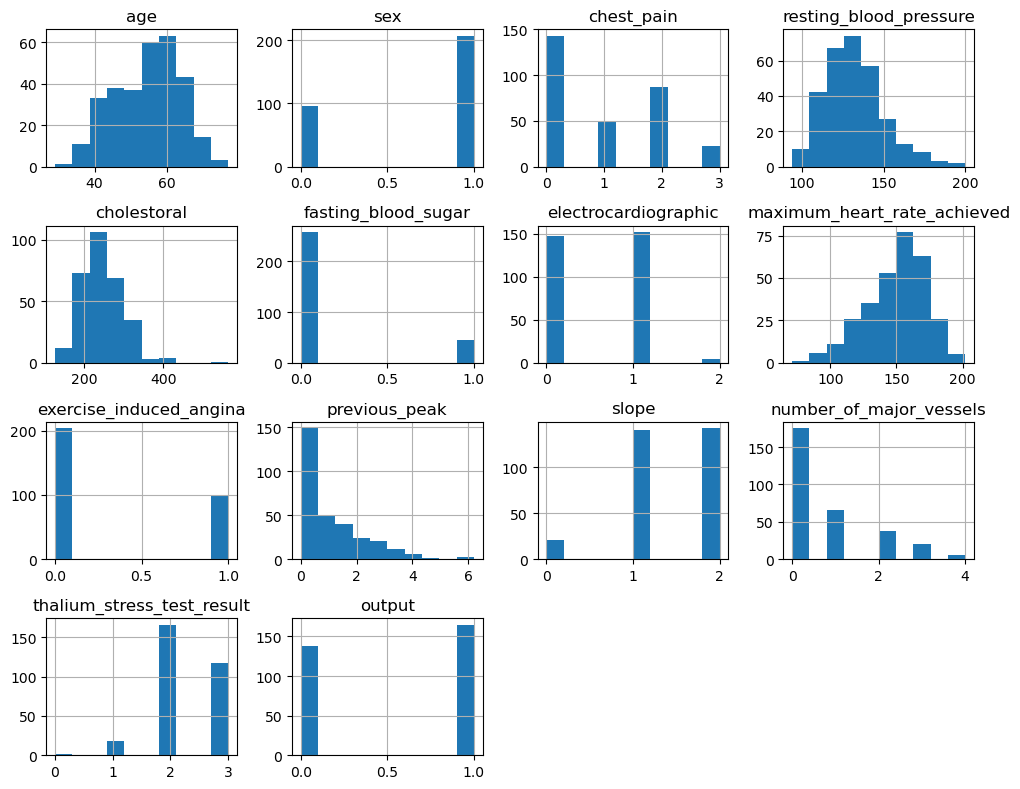

In [22]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [23]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

# Create Models

In [28]:
# Select features and target
X = df.drop(columns='output')

min_max_scaler = StandardScaler()
X = min_max_scaler.fit_transform(X)

y = df['output']
# Balancing the data with subsampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Divide in train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state=42)

In [29]:
y_resampled.value_counts()

0    138
1    138
Name: output, dtype: int64

In [42]:
X_resampled

array([[ 1.39335191,  0.68100522, -0.93851463, ..., -0.64911323,
         2.22410436, -0.51292188],
       [ 1.39335191,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.84190778, -1.46841752, -0.93851463, ..., -2.27457861,
         1.24459328, -0.51292188],
       ...,
       [-1.03300228, -1.46841752, -0.93851463, ..., -0.64911323,
        -0.71442887, -0.51292188],
       [-0.37126932, -1.46841752,  1.00257707, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [-1.47415758,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188]])

In [47]:
columns = list(df.columns)
columns.remove('output')
df_new = pd.DataFrame(X_resampled, columns=columns)

df_new['output'] = y_resampled

In [30]:
X_train.shape, X_test.shape

((193, 13), (83, 13))

In [31]:
y_train.shape, y_test.shape

((193,), (83,))

In [32]:
log_model = LogisticRegression().fit(X_train, y_train)
tree_model = DecisionTreeClassifier().fit(X_train, y_train)
random_model = RandomForestClassifier().fit(X_train, y_train)
extra_model = ExtraTreesClassifier().fit(X_train, y_train)
cat_model = CatBoostClassifier().fit(X_train, y_train)
xgb_model = XGBClassifier().fit(X_train, y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)

Learning rate set to 0.005103
0:	learn: 0.6886369	total: 1.54ms	remaining: 1.54s
1:	learn: 0.6848804	total: 2.68ms	remaining: 1.34s
2:	learn: 0.6810021	total: 3.8ms	remaining: 1.26s
3:	learn: 0.6771498	total: 4.88ms	remaining: 1.21s
4:	learn: 0.6733220	total: 6.22ms	remaining: 1.24s
5:	learn: 0.6693446	total: 7.38ms	remaining: 1.22s
6:	learn: 0.6652999	total: 8.54ms	remaining: 1.21s
7:	learn: 0.6620586	total: 9.61ms	remaining: 1.19s
8:	learn: 0.6589200	total: 11.2ms	remaining: 1.23s
9:	learn: 0.6553339	total: 12.3ms	remaining: 1.22s
10:	learn: 0.6513234	total: 13.4ms	remaining: 1.21s
11:	learn: 0.6483274	total: 14.4ms	remaining: 1.19s
12:	learn: 0.6457421	total: 15.4ms	remaining: 1.17s
13:	learn: 0.6430571	total: 16.5ms	remaining: 1.17s
14:	learn: 0.6400460	total: 17.5ms	remaining: 1.15s
15:	learn: 0.6374791	total: 18.7ms	remaining: 1.15s
16:	learn: 0.6343154	total: 19.9ms	remaining: 1.15s
17:	learn: 0.6319971	total: 20.9ms	remaining: 1.14s
18:	learn: 0.6287286	total: 21.9ms	remaining:

## Logistic Regression

In [34]:
evaluate_classification_model(log_model, X_test, y_test)

Accuracy Score: 0.8795180722891566
Auc Score: 0.8789198606271776
Recall Score: 0.8292682926829268
Precision Score: 0.918918918918919
F1 Score: 0.8717948717948718
Kappa Score: 0.7587209302325582
MCC Score: 0.7622793592416188


## Decision Tree Classifier

In [35]:
evaluate_classification_model(tree_model, X_test, y_test)

Accuracy Score: 0.7710843373493976
Auc Score: 0.7697444831591173
Recall Score: 0.6585365853658537
Precision Score: 0.84375
F1 Score: 0.7397260273972602
Kappa Score: 0.5409024745269286
MCC Score: 0.554164961874298


## Random Forest

In [36]:
evaluate_classification_model(random_model, X_test, y_test)

Accuracy Score: 0.8313253012048193
Auc Score: 0.8304297328687573
Recall Score: 0.7560975609756098
Precision Score: 0.8857142857142857
F1 Score: 0.8157894736842105
Kappa Score: 0.6620127981384526
MCC Score: 0.669069214873353


## Extra Tree 

In [37]:
evaluate_classification_model(extra_model, X_test, y_test)

Accuracy Score: 0.8554216867469879
Auc Score: 0.8545296167247387
Recall Score: 0.7804878048780488
Precision Score: 0.9142857142857143
F1 Score: 0.8421052631578947
Kappa Score: 0.7102966841186736
MCC Score: 0.7178677604221125


In [38]:
evaluate_classification_model(xgb_model, X_test, y_test)

Accuracy Score: 0.8433734939759037
Auc Score: 0.8423344947735192
Recall Score: 0.7560975609756098
Precision Score: 0.9117647058823529
F1 Score: 0.8266666666666665
Kappa Score: 0.6860634274076229
MCC Score: 0.6960809253725043


## Catboost

In [39]:
evaluate_classification_model(cat_model, X_test, y_test)

Accuracy Score: 0.8554216867469879
Auc Score: 0.8545296167247387
Recall Score: 0.7804878048780488
Precision Score: 0.9142857142857143
F1 Score: 0.8421052631578947
Kappa Score: 0.7102966841186736
MCC Score: 0.7178677604221125


In [40]:
evaluate_classification_model(knn_model, X_test, y_test)

Accuracy Score: 0.8795180722891566
Auc Score: 0.8789198606271776
Recall Score: 0.8292682926829268
Precision Score: 0.918918918918919
F1 Score: 0.8717948717948718
Kappa Score: 0.7587209302325582
MCC Score: 0.7622793592416188


# Pycaret

In [49]:
import pycaret
from pycaret.classification import *

In [50]:
setup1 = setup(data=df_new, target='output')

,Description,Value
0,Session id,3283
1,Target,output
2,Target type,Binary
3,Original data shape,"(276, 14)"
4,Transformed data shape,"(276, 14)"
5,Transformed train set shape,"(193, 14)"
6,Transformed test set shape,"(83, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [51]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8555,0.9115,0.8444,0.8639,0.8509,0.7104,0.7153,0.1250
catboost,CatBoost Classifier,0.8505,0.9182,0.8544,0.8532,0.8494,0.7008,0.7083,0.7660
knn,K Neighbors Classifier,0.8500,0.9125,0.8844,0.8339,0.8532,0.7007,0.7110,0.0190
nb,Naive Bayes,0.8492,0.9116,0.8667,0.8474,0.8511,0.6982,0.7082,0.0160
lr,Logistic Regression,0.8395,0.9138,0.8444,0.8526,0.8369,0.6788,0.6955,0.5580
ridge,Ridge Classifier,0.8342,0.0000,0.8433,0.8425,0.8329,0.6681,0.6833,0.0170
lda,Linear Discriminant Analysis,0.8342,0.9127,0.8433,0.8425,0.8329,0.6681,0.6833,0.0170
rf,Random Forest Classifier,0.8297,0.9031,0.8133,0.8510,0.8235,0.6586,0.6686,0.1280
qda,Quadratic Discriminant Analysis,0.8137,0.8902,0.7844,0.8496,0.8001,0.6284,0.6483,0.0180
lightgbm,Light Gradient Boosting Machine,0.8034,0.8962,0.8044,0.8046,0.8000,0.6070,0.6134,0.1140


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [52]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:
creat_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.8400,0.7000,0.7000,0.7000,0.4000,0.4000
1,0.8000,0.9300,0.9000,0.7500,0.8182,0.6000,0.6124
2,0.9000,0.8900,1.0000,0.8333,0.9091,0.8000,0.8165
3,0.8947,0.9778,0.8889,0.8889,0.8889,0.7889,0.7889
4,0.8947,0.9222,0.7778,1.0000,0.8750,0.7865,0.8051
5,0.7895,0.9444,0.7778,0.7778,0.7778,0.5778,0.5778
6,0.8421,0.9000,0.8000,0.8889,0.8421,0.6851,0.6889
7,0.9474,1.0000,1.0000,0.9091,0.9524,0.8939,0.8989
8,0.9474,0.9222,1.0000,0.9091,0.9524,0.8939,0.8989


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
# Optimize the hyperparameters
tuned = tune_model(creat_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.8400,0.7000,0.7000,0.7000,0.4000,0.4000
1,0.7500,0.9200,0.8000,0.7273,0.7619,0.5000,0.5025
2,0.8500,0.8700,0.9000,0.8182,0.8571,0.7000,0.7035
3,0.8947,0.9444,0.8889,0.8889,0.8889,0.7889,0.7889
4,0.8421,0.9333,0.7778,0.8750,0.8235,0.6816,0.6854
5,0.7895,0.8889,0.7778,0.7778,0.7778,0.5778,0.5778
6,0.8421,0.8556,0.8000,0.8889,0.8421,0.6851,0.6889
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8421,0.9222,1.0000,0.7692,0.8696,0.6780,0.7161


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Plot Model

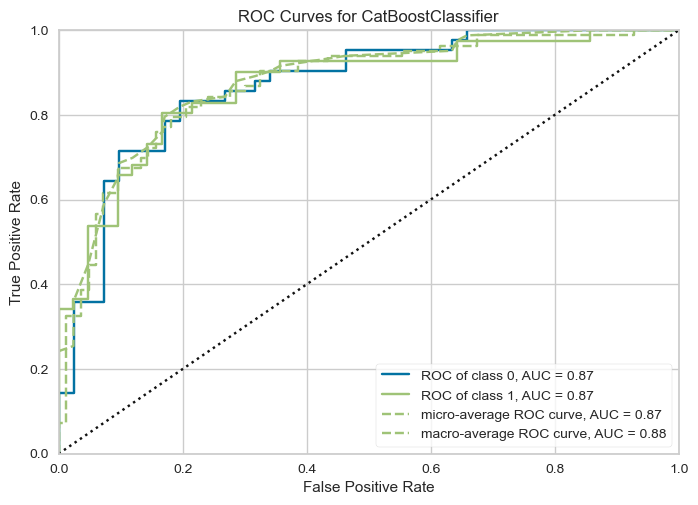

In [55]:
plot_model(creat_model)

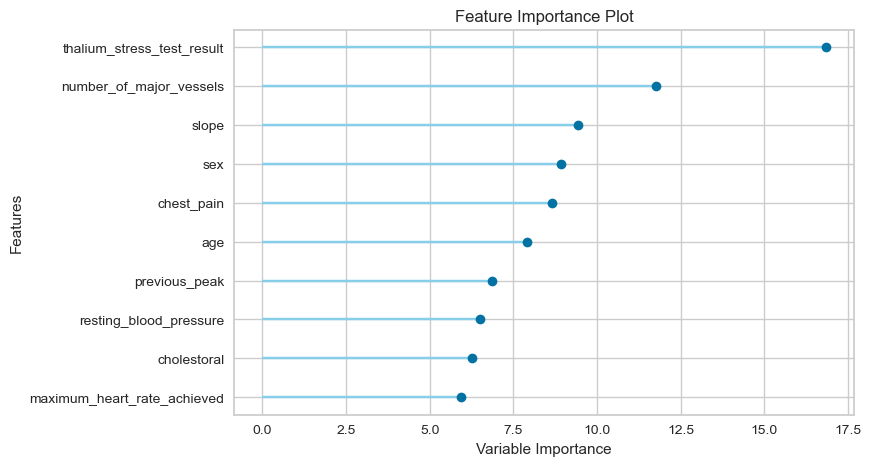

In [56]:
plot_model(creat_model, plot='feature')